In [193]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from tqdm import tqdm
import time
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import kstest, shapiro
import seaborn as sns
import matplotlib.pyplot as plt
import Func

In [40]:
df = pd.read_csv('bank-full.csv', sep=';')
df_income = pd.read_excel('median-income.xlsx')

In [9]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            45211 non-null  int64  
 1   job            45211 non-null  object 
 2   marital        45211 non-null  object 
 3   education      45211 non-null  object 
 4   default        45211 non-null  object 
 5   balance        45211 non-null  int64  
 6   housing        45211 non-null  object 
 7   loan           45211 non-null  object 
 8   contact        45211 non-null  object 
 9   day            45211 non-null  int64  
 10  month          45211 non-null  object 
 11  duration       45211 non-null  int64  
 12  campaign       45211 non-null  int64  
 13  pdays          45211 non-null  int64  
 14  previous       45211 non-null  int64  
 15  poutcome       45211 non-null  object 
 16  y              45211 non-null  object 
 17  median_income  45211 non-null  float64
dtypes: flo

In [299]:
# check for missing values
df.isna().sum()

age              0
job              0
marital          0
education        0
default          0
balance          0
housing          0
loan             0
contact          0
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome         0
y                0
median_income    0
dtype: int64

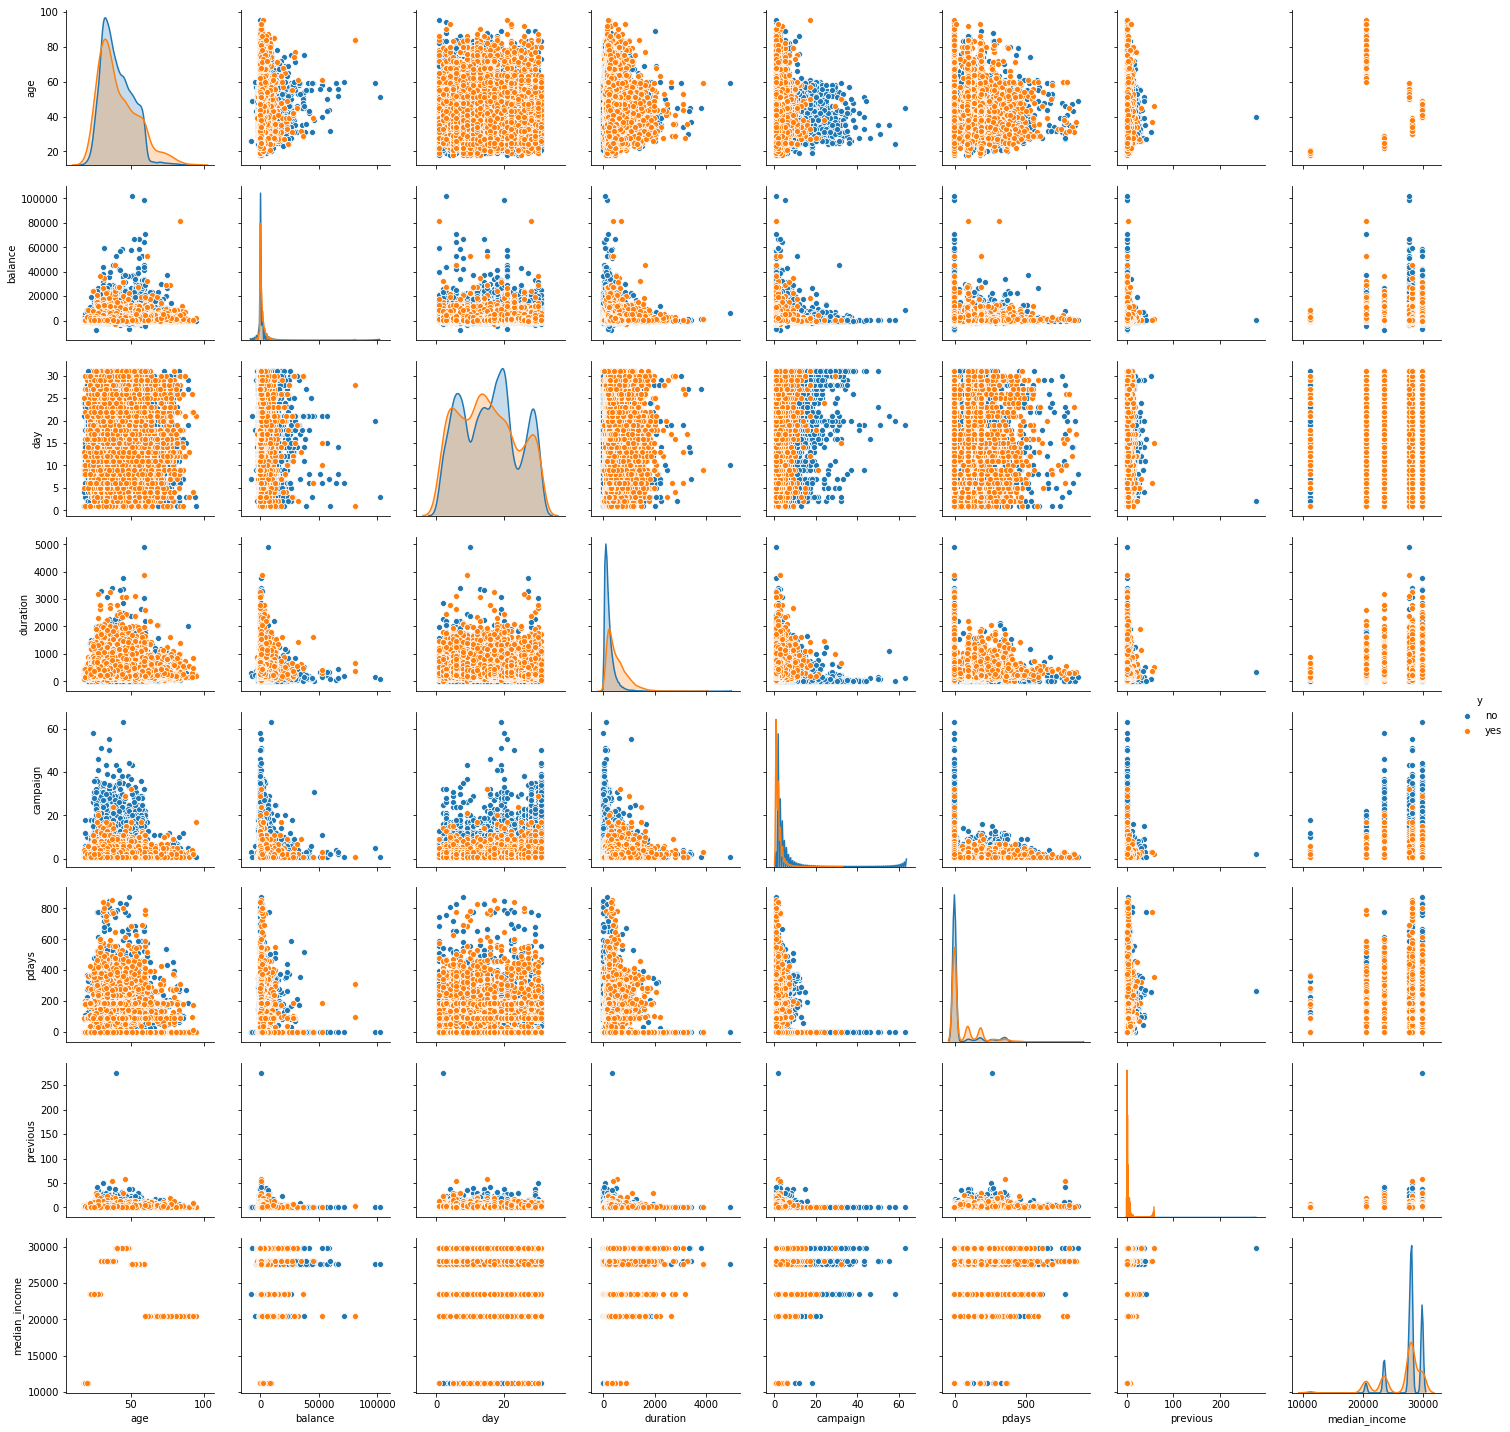

In [326]:
# Take a look at the relationship between each feature
sns.pairplot(df, hue='y')

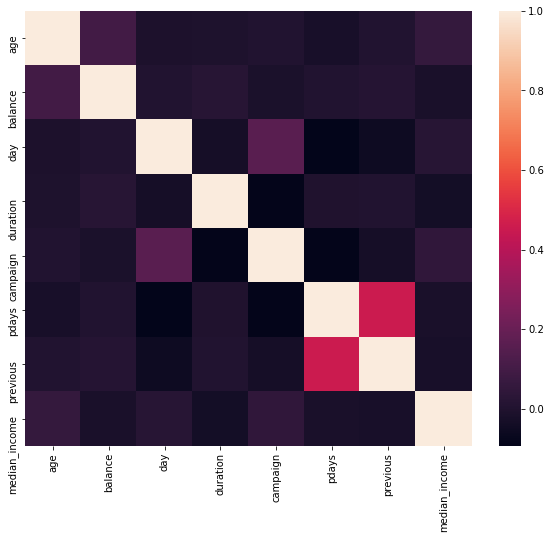

In [297]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

- The data set seems very clean
- Normally more data cleaning and imputation would be required
- No linear relationship is observed between features
- Most numerical features have low correlation betweeen each other

## Exploring age and balance, as additional data will be added to the banking dataset

## age

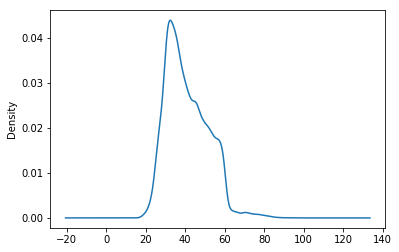

In [13]:
df['age'].plot.density()

In [14]:
df['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

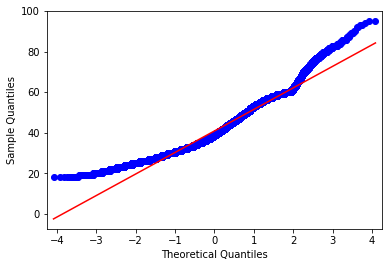

In [19]:
# look to see if age is normally distributed
qqplot(df['age'], line='s')
plt.show()

In [31]:
swtest = shapiro(df['age'])
print(swtest)
# pvalue smaller than 0.05, so it's not normally distributed

(0.9605178833007812, 0.0)


/Users/kunsitu/anaconda2/envs/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## balance

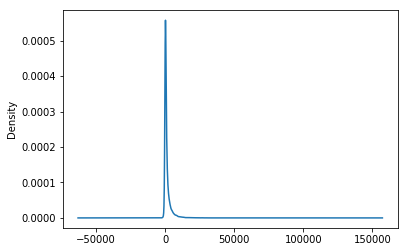

In [32]:
df['balance'].plot.density()

In [33]:
df['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

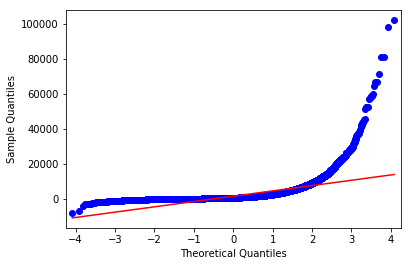

In [35]:
qqplot(df['balance'], line='s')
plt.show()

In [39]:
swtest = shapiro(df['balance'])
print(swtest)
# pvalue smaller than 0.05, so it's not normally distributed

(0.45716971158981323, 0.0)


/Users/kunsitu/anaconda2/envs/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


- From the analysis, we can see that neither of columns (balance, age) are normally distributed, as the dist polt, Quantile-Quantile Plot and Shapiro-Wilk all support that
- In this case, they shouldn't matter that much as we are using this data set for classification
- However, if the problem is a regression problem, we will need to transform the data to make sure they are normally distributed.
- If the regression problem, outlier detection will be needed, and I would probably use the rule of 3 times of the standard deviation

# adding more median income data to thee current dataset

In [62]:
df_income['avg_median_income'] = (df_income['Male_median_income'] + df_income['Female_median_income'])/2
df_income['Age_group'] = df_income['Age_group'].str.strip()
df_income

,Age_group,Male_median_income,Female_median_income,avg_median_income
0,18-21,13357,9185,11271.0
1,22-29,25918,21093,23505.5
2,30-39,33120,22989,28054.5
3,40-49,37043,22567,29805.0
4,50-59,34685,20705,27695.0
5,60+,26190,14792,20491.0


In [68]:
# adding median income 
g_one = df_income.loc[df_income['Age_group'] == '18-21', 'avg_median_income'].values[0]
g_two = df_income.loc[df_income['Age_group'] == '22-29', 'avg_median_income'].values[0]
g_three = df_income.loc[df_income['Age_group'] == '30-39', 'avg_median_income'].values[0]
g_four = df_income.loc[df_income['Age_group'] == '40-49', 'avg_median_income'].values[0]
g_five = df_income.loc[df_income['Age_group'] == '50-59', 'avg_median_income'].values[0]
g_six = df_income.loc[df_income['Age_group'] == '60+', 'avg_median_income'].values[0]

def adding_median_income(age):
    if age >= 18 and age <=21:
        return g_one
    elif age >=22 and age <=29:
        return g_two
    elif age >=30 and age <= 39:
        return g_three
    elif age >= 40 and age <= 49:
        return g_four
    elif age >=50 and age <= 59:
        return g_five
    elif age >= 60:
        return g_six
    else:
        return 999999999
    
df['median_income'] = df['age'].apply(adding_median_income)

# investigating target split

In [44]:
df['y'].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: y, dtype: float64

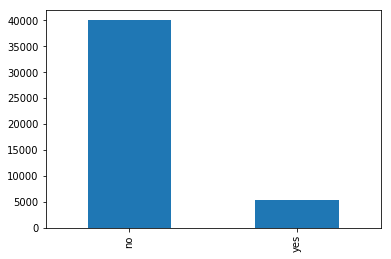

In [151]:
df['y'].value_counts().plot.bar()

- we have an imbalance dataset, which means we need using a sampling strategy
- but we need to transform categorical data to numbers first
- we can either use one hot encoding or using categorical transformation
- if using decision tree, the latter one should work, and no normalisation is required

## Preparing data for ml

In [81]:
col_obj = [i for i in df.columns if df[i].dtypes == 'object']
col_num = [i for i in df.columns if df[i].dtypes != 'object']
df_obj = df[col_obj]

In [116]:
# change categorical data to numerical
from sklearn.preprocessing import LabelEncoder
df_obj_out = df_obj.copy()
check_dic = []
for i in df_obj_out.columns:
    le = preprocessing.LabelEncoder()
    le.fit(df_obj_out[i])
    output = le.transform(df_obj_out[i])
    df_obj_out[i] = output
    dic = dict(zip(le.classes_, range(len(le.classes_))))
    check_dic.append([i,dic ])

In [109]:
X = pd.concat([df_obj_out.drop('y', axis =1), df[col_num]], axis =1)
y = df_obj_out['y']

In [142]:
# one hot encoding
from sklearn.preprocessing import StandardScaler
y2 = df['y'].replace({'no':0, 'yes':1})
df_num = df[col_num]
scaler = StandardScaler()
scaler.fit(df_num)
df_num2 = pd.DataFrame(scaler.transform(df_num), columns=df_num.columns)
X2 = pd.concat([pd.get_dummies(df_obj.drop('y', axis=1)), df_num2], axis=1)


In [160]:
# Train test split for label encoded data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (33908, 17)
X_test shape: (11303, 17)
y_train shape: (33908,)
y_test shape: (11303,)


In [162]:
y_train.value_counts(normalize=True)

0    0.882506
1    0.117494
Name: y, dtype: float64

In [163]:
y_test.value_counts(normalize=True)

0    0.884544
1    0.115456
Name: y, dtype: float64

In [277]:
# Train test split for one hot encoded data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=1)

## smapling

In [278]:
# dealing with unbalance y via oversmapling
# only on train set through
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1)
X_train_sa , y_train_sa = smote.fit_sample(X_train, y_train)
X_train_sa2, y_train_sa2 = smote.fit_sample(X_train2, y_train2)

In [279]:
pd.Series(y_train_sa).value_counts(normalize=True)

1    0.5
0    0.5
dtype: float64

In [280]:
len(y_train_sa)

59848

In [281]:
# dealing with unbalance y via undersmapling
from imblearn.under_sampling import NearMiss
nm = NearMiss() 
X_train_nm , y_train_nm = nm.fit_sample(X_train, y_train)
X_train_nm2 , y_train_nm2 = nm.fit_sample(X_train2, y_train2)

In [282]:
pd.Series(y_train_nm).value_counts(normalize=True)

1    0.5
0    0.5
dtype: float64

In [283]:
len(y_train_nm)

7968

## buliding the model (RandomFroest) no sampling vs under sampling vs over sampling

In [301]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, roc_auc_score, f1_score, make_scorer


In [234]:
# Random forest oversampling
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_train_sa,y_train_sa)
y_pred = rfc.predict(X_test)

In [235]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      9998
           1       0.56      0.41      0.47      1305

    accuracy                           0.90     11303
   macro avg       0.74      0.68      0.71     11303
weighted avg       0.88      0.90      0.89     11303



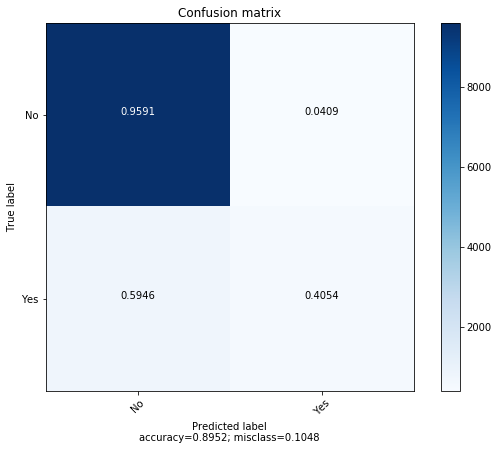

In [236]:
cf_mix = confusion_matrix(y_test, y_pred)
Func.plot_confusion_matrix(cf_mix, ['No', 'Yes'])

In [237]:
# Random forest undersampling
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_train_nm , y_train_nm)
y_pred = rfc.predict(X_test)

In [238]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.50      0.66      9998
           1       0.18      0.86      0.30      1305

    accuracy                           0.54     11303
   macro avg       0.57      0.68      0.48     11303
weighted avg       0.88      0.54      0.61     11303



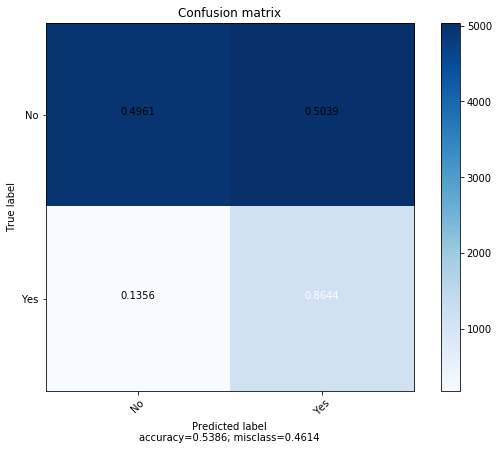

In [239]:
cf_mix = confusion_matrix(y_test, y_pred)
Func.plot_confusion_matrix(cf_mix, ['No', 'Yes'])

In [317]:
# Random forest no sampling
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

In [318]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      9998
           1       0.61      0.36      0.45      1305

    accuracy                           0.90     11303
   macro avg       0.77      0.67      0.70     11303
weighted avg       0.89      0.90      0.89     11303



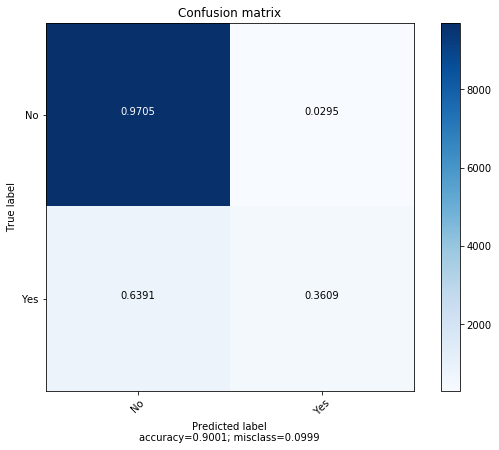

In [319]:
cf_mix = confusion_matrix(y_test, y_pred)
Func.plot_confusion_matrix(cf_mix, ['No', 'Yes'])

In [320]:
# check the roc score
roc_auc_score(y_test, y_pred)

0.6657068195248245

In [250]:
# Feature importance
fea_imp = []
for a, b in zip(X_train.columns, rfc.feature_importances_):
    fea_imp.append([a,b])
fea_imp = sorted(fea_imp, key=lambda x: x[1], reverse=True)
for i in fea_imp:
    print(f'{i[0]}: {i[1]:.5f}')

duration: 0.29726
balance: 0.10652
day: 0.08845
month: 0.08776
age: 0.08583
poutcome: 0.04987
job: 0.04684
pdays: 0.04516
campaign: 0.03916
median_income: 0.03276
education: 0.02783
housing: 0.02272
marital: 0.02144
contact: 0.01960
previous: 0.01765
loan: 0.00974
default: 0.00138


- From the classification report and confusion matrix, it seems that it's not prediciting very well for 'Yes' label, as true negative is low
- oversampling performed better than undersampling
- No sampling preformed the best, this is probably because random forest classifer is good at dealing with imbalance dataset, adding additional data adds noise to it too.
- If time premits, some of the features can be discard and rerun the model, as less important feature might have noise embed in them

## Tune the RandomForest model

- Use precision as the tuning target, as we need maxise subscriber (1)'s precison

In [266]:
start = time.time()
from sklearn.model_selection import GridSearchCV

para2 = {'n_estimators': [100, 300, 500],
        'max_depth' : [5, 8, 15],
        'min_samples_split' : [2, 5, 10],
        'min_samples_leaf': [1, 2, 5] 
}
f1_s = make_scorer(f1_score , average='macro')
precision_s = make_scorer(precision_score, average = 'macro')

rfc_gv = RandomForestClassifier(random_state=1, n_jobs=-1, verbose=0)
gv = GridSearchCV(rfc_gv, param_grid=para2, scoring=precision_s , cv=5)
gv.fit(X_train,y_train)
print(f'Time taken: {time.time()-start:.0f} s')


Time taken: 2622 s


In [267]:
# best parameters
gv.best_params_

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

In [268]:
# best score
gv.best_score_

0.846763971743602

In [328]:
%time
# use the best model to predict testing set
rfc_best = RandomForestClassifier(random_state=1, n_estimators=100, min_samples_leaf=1, max_depth= 5,
                                  min_samples_split=10, n_jobs=-1)
rfc_best.fit(X_train,y_train)
y_pred=rfc_best.predict(X_test)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs


In [323]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.94      9998
           1       0.76      0.11      0.19      1305

    accuracy                           0.89     11303
   macro avg       0.83      0.55      0.56     11303
weighted avg       0.88      0.89      0.86     11303



Text(0.5,1,'Precision-recall curve')

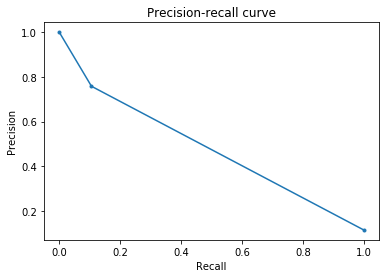

In [325]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, marker='.', label='rfc')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')

- We can see the overall pricision increased from 0.77 to 0.83
- 1's precision increased from 0.61 to 0.76
- So the best model would be {'max_depth': 5,
                         'min_samples_leaf': 1,
                         'min_samples_split': 10,
                         'n_estimators': 100}
- Of course, more grid search parameters should be tested if time is premitted
- In an ideal world, we would like to have both high precision and high recall
- This model will be quite picky, but the prediction will be precise.
- This meeans we when the model identify a potential subscriber, we can be quite sure that he/she would subscribe.
- It also means the marketing expense can be used effectively, which is suitable for a small company. 
- If marketing budge is huge, we might need to re-train the model, so we can high recall model.
- This means we would capture more potential subscriber, but also more non-subscriber.
- Of course, to deploy this model, more A-B testing is needed to see how the model can be envolved, and how many subscribers are we actually capturing.

##  buliding the model (Logistic regression)

In [286]:
#logistic regression over sampling
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(random_state=1)
lgr.fit(X_train_sa2, y_train_sa2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [288]:
y_pred = lgr.predict(X_test2)
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      9998
           1       0.41      0.81      0.54      1305

    accuracy                           0.84     11303
   macro avg       0.69      0.83      0.72     11303
weighted avg       0.91      0.84      0.86     11303



In [289]:
#logistic regression under sampling 
lgr = LogisticRegression(random_state=1)
lgr.fit(X_train_nm2,y_train_nm2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [290]:
y_pred = lgr.predict(X_test2)
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.64      0.77      9998
           1       0.23      0.80      0.35      1305

    accuracy                           0.66     11303
   macro avg       0.59      0.72      0.56     11303
weighted avg       0.88      0.66      0.72     11303



In [327]:
%time
#logistic regression under sampling 
lgr = LogisticRegression(random_state=1)
lgr.fit(X_train2,y_train2)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.77 µs


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [292]:
y_pred = lgr.predict(X_test2)
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      9998
           1       0.63      0.35      0.45      1305

    accuracy                           0.90     11303
   macro avg       0.78      0.66      0.70     11303
weighted avg       0.89      0.90      0.89     11303



- Again no sampling preeformed the best, which also might confirmed my previous theory.
- With hyperparameter tuning, I think it can be close to the randomfroest classifer.
- Also logistic regression might be faster than random forest